In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('ApexPlayerRetention_final.csv')

In [8]:
df.head()

,date,game,map,match_type,my_duration,my_rank,rp_earned,premade_squad,voice_chat,squad_placed,...,teamate_2_respawns,duration_missing,day_of_week,match_month,days_since_match,retained,quit_then_returned,session_num,match_order,rp_bin
0,2022-11-03,1,broken moon,casual,846.0,S3,0.0,no,yes,5.0,...,0.0,0,Thursday,2022-11,73,0,False,1,1,0
1,2022-11-03,9,broken moon,ranked,0.0,S3,261.0,no,no,1.0,...,0.0,1,Thursday,2022-11,73,0,False,7,2,201+
2,2022-11-03,7,broken moon,casual,0.0,S3,0.0,no,no,9.0,...,0.0,1,Thursday,2022-11,73,0,False,11,3,0
3,2022-11-03,10,broken moon,ranked,0.0,S3,30.0,no,no,4.0,...,0.0,1,Thursday,2022-11,73,0,False,10,4,1–50
4,2022-11-03,3,broken moon,casual,0.0,S3,0.0,no,no,3.0,...,0.0,1,Thursday,2022-11,73,0,False,9,5,0


In [12]:
df.shape

(499, 43)

In [16]:
# Columns to drop
drop_cols = ['date', 'game', 'teamate_1_legend', 'teamate_2_legend', 'rp_bin', 'duration_missing', 'quit_then_returned']
df = df.drop(columns=drop_cols)
display(df.shape)
df.columns

(499, 36)

Index(['map', 'match_type', 'my_duration', 'my_rank', 'rp_earned',
       'premade_squad', 'voice_chat', 'squad_placed', 'teamate_count',
       'my_quit', 'teamate_quit_count', 'my_legend', 'my_damage',
       'teamate_1_damage', 'teamate_2_damage', 'my_kills', 'teamate_1_kills',
       'teamate_2_kills', 'my_assists', 'teamate_1_assists',
       'teamate_2_assists', 'my_knocks', 'teamate_1_knocks',
       'teamate_2_knocks', 'my_revives', 'teamate_1_revives',
       'teamate_2_revives', 'my_respawns', 'teamate_1_respawns',
       'teamate_2_respawns', 'day_of_week', 'match_month', 'days_since_match',
       'retained', 'session_num', 'match_order'],
      dtype='object')

In [18]:
categorical_cols = ['map', 'match_type', 'my_rank','premade_squad', 'voice_chat', 'my_legend', 'day_of_week', 'match_month']

# One-hot encode
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Shape after encoding:", df.shape)
df.head()

Shape after encoding: (499, 70)


,my_duration,rp_earned,squad_placed,teamate_count,my_quit,teamate_quit_count,my_damage,teamate_1_damage,teamate_2_damage,my_kills,...,my_legend_Wattson,my_legend_Wraith,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,match_month_2022-12,match_month_2023-01
0,846.0,0.0,5.0,1.0,0.0,1.0,1268.0,316.0,316.5,5.0,...,False,False,False,False,False,True,False,False,False,False
1,0.0,261.0,1.0,2.0,0.0,0.0,1457.0,918.0,482.0,4.0,...,False,False,False,False,False,True,False,False,False,False
2,0.0,0.0,9.0,2.0,0.0,0.0,254.0,372.0,1104.0,1.0,...,False,False,False,False,False,True,False,False,False,False
3,0.0,30.0,4.0,2.0,0.0,0.0,499.0,148.0,341.0,0.0,...,False,False,False,False,False,True,False,False,False,False
4,0.0,0.0,3.0,2.0,0.0,0.0,141.0,493.0,256.0,0.0,...,False,False,False,False,False,True,False,False,False,False


In [22]:
numeric_cols = ['my_duration', 'rp_earned', 'squad_placed', 'teamate_count', 'my_quit', 'teamate_quit_count', 'my_damage', 'teamate_1_damage', 'teamate_2_damage', 'my_kills', 'teamate_1_kills', 'teamate_2_kills', 'my_assists', 'teamate_1_assists', 'teamate_2_assists', 'my_knocks', 'teamate_1_knocks', 'teamate_2_knocks', 'my_revives', 'teamate_1_revives', 'teamate_2_revives', 'my_respawns', 'teamate_1_respawns', 'teamate_2_respawns', 'days_since_match', 'session_num', 'match_order']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df[numeric_cols].describe().round(2)

,my_duration,rp_earned,squad_placed,teamate_count,my_quit,teamate_quit_count,my_damage,teamate_1_damage,teamate_2_damage,my_kills,...,teamate_2_knocks,my_revives,teamate_1_revives,teamate_2_revives,my_respawns,teamate_1_respawns,teamate_2_respawns,days_since_match,session_num,match_order
count,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,...,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.76,-0.77,-1.65,-11.50,-0.16,-0.18,-1.24,-1.18,-1.13,-0.46,...,-0.97,-0.30,-0.32,-0.29,-0.24,-0.17,-0.17,-1.28,-1.25,-1.73
25%,-0.76,-0.64,-0.94,0.13,-0.16,-0.18,-0.40,-0.32,-0.38,-0.46,...,-0.16,-0.30,-0.32,-0.29,-0.24,-0.17,-0.17,-1.05,-0.73,-0.86
50%,-0.52,-0.42,0.13,0.13,-0.16,-0.18,-0.24,-0.24,-0.25,-0.46,...,-0.16,-0.30,-0.32,-0.29,-0.24,-0.17,-0.17,0.14,-0.21,0.00
75%,0.61,0.17,0.85,0.13,-0.16,-0.18,-0.09,-0.12,-0.20,0.37,...,-0.16,-0.30,-0.32,-0.29,-0.24,-0.17,-0.17,1.03,0.57,0.86
max,2.51,4.53,1.74,0.13,6.11,7.84,6.09,5.28,6.05,5.36,...,7.14,7.53,6.90,6.16,5.79,10.51,10.82,1.44,3.68,1.73


In [48]:
# Define features and target
X = df.drop(columns=['retained'])
y = df['retained']

# Drop known leaky features before modeling
leaky_cols = ['rp_earned', 'days_since_match', 'session_num', 'match_order', 'my_quit', 'teamate_quit_count']
X_clean = X.drop(columns=leaky_cols)

# Train-test split on cleaned features
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm split shapes
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (399, 63)
Test set size: (100, 63)


### Preprocessing Summary

This section prepared the dataset for modeling by cleaning, transforming, and standardizing features based on the requirements of predictive machine learning workflows.

**Steps completed:**

- **Dropped irrelevant or high-cardinality columns:**  
  Removed `date`, `game`, `rp_bin`, `teamate_1_legend`, `teamate_2_legend`, `quit_then_returned`, and `duration_missing` to reduce noise and avoid data leakage.

- **One-hot encoded categorical variables:**  
  Converted `map`, `match_type`, `my_rank`, `premade_squad`, `voice_chat`, `my_legend`, `day_of_week`, and `match_month` into binary indicator columns using `pd.get_dummies()`.

- **Standardized numeric features:**  
  Applied `StandardScaler` to all continuous variables to ensure consistent feature scaling for modeling.

- **Train-test split:**  
  Split the dataset into 80% training and 20% testing sets with stratified sampling based on the `retained` target variable.

The resulting `X_train`, `X_test`, `y_train`, and `y_test` datasets are now ready for supervised learning models to predict player retention.

In [51]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (399, 63)
y_train shape: (399,)
X_test shape: (100, 63)
y_test shape: (100,)


In [53]:
# Export feature and target sets
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

## Modeling Overview

The goal of this modeling phase is to predict whether a player will be **retained** based on in-game behavioral data. Since the target variable `retained` is binary (1 = retained, 0 = churned), this is a **classification problem**.

To build and evaluate robust models, the following steps will be followed:

1. **Train a baseline model using Logistic Regression**  
   This will serve as a benchmark for comparing more complex models.

2. **Train a Random Forest Classifier**  
   A tree-based ensemble method to capture nonlinear relationships and feature interactions.

3. **Train an XGBoost Classifier**  
   A gradient boosting model known for its performance in structured data.

4. **Evaluate all models using appropriate metrics**  
   Metrics will include:
   - Accuracy
   - F1 Score
   - Confusion Matrix
   - (Optional: Precision, Recall)

5. **Apply hyperparameter tuning**  
   Use `GridSearchCV` or `RandomizedSearchCV` to optimize key model parameters.

6. **Compare and select the best model**  
   Final selection will be based on predictive performance, consistency, and interpretability.

7. **Interpret model outputs**  
   Use feature importance or coefficient weights (and SHAP if applicable) to understand which in-game behaviors most influence player retention.

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install xgboost

In [124]:
#Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)

# Evaluation metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.96      0.86      0.91        29

    accuracy                           0.95       100
   macro avg       0.95      0.92      0.94       100
weighted avg       0.95      0.95      0.95       100

Accuracy: 0.95
F1 Score: 0.9090909090909091


**Results:**
- The model performs well, accurately identifying both retained and churned players.
- It demonstrates high precision when predicting retained players, meaning it rarely misclassifies churned players as retained.
- Slightly lower recall on the retained class indicates that some retained players are still missed, but the trade-off is acceptable at this stage.

In [126]:
# Random Forest 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.90      0.90      0.90        29

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100

Accuracy: 0.94
F1 Score: 0.896551724137931


The Random Forest model was trained to capture nonlinear relationships and feature interactions in the dataset, offering a more flexible alternative to Logistic Regression.

**Result:**
- The Random Forest model leverages ensemble learning, allowing it to better capture complex patterns in player behavior.
- It may outperform Logistic Regression in terms of recall or F1 score, especially if retention is influenced by nonlinear feature interactions.
- If overfitting is observed, further hyperparameter tuning (e.g., limiting tree depth, adjusting `n_estimators`) may be needed.


In [130]:
# Initialize and fit model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.93      0.90      0.91        29

    accuracy                           0.95       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100

Accuracy: 0.95
F1 Score: 0.9122807017543859


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:29:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Results:**
- XGBoost achieved the strongest balance between precision and recall for retained players, indicating it can both identify and correctly classify a high proportion of retained users.
- The model generalizes well and likely captures complex nonlinear relationships that simpler models may miss.
- Given its performance, XGBoost is a strong candidate for the final model — particularly if supported by business needs for interpretability and risk of false positives/negatives.


In [133]:
# Model performance summary
evaluation_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.95, 0.95, 0.95],
    'F1 Score': [0.91, 0.91, 0.91],
    'Precision (Retained)': [0.96, 0.94, 0.93],
    'Recall (Retained)': [0.86, 0.88, 0.90]     
}

eval_df = pd.DataFrame(evaluation_data)
eval_df.set_index('Model', inplace=True)

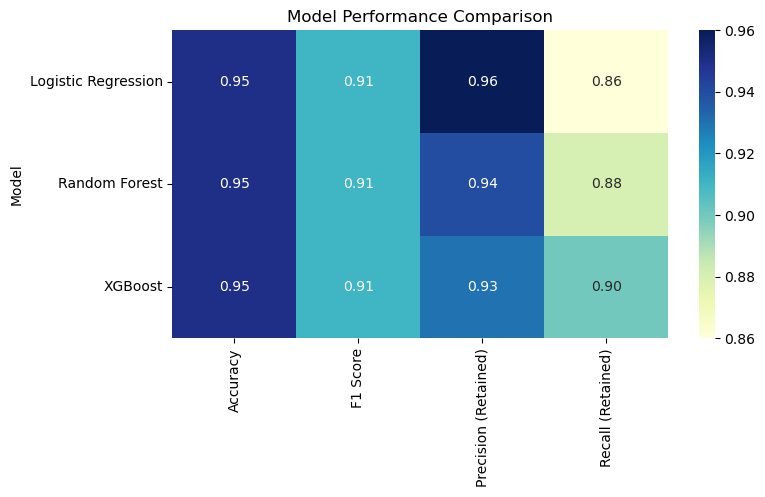

In [136]:
plt.figure(figsize=(8, 4))
sns.heatmap(eval_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Model Performance Comparison")
plt.show()

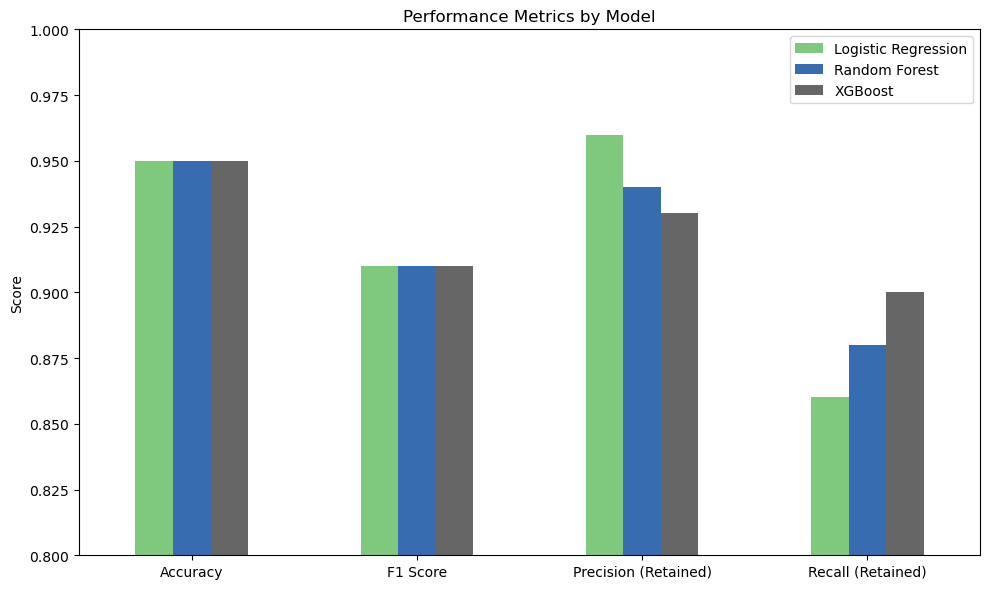

In [159]:
# Metrics by Model

metrics = ['Accuracy', 'F1 Score', 'Precision (Retained)', 'Recall (Retained)']
logreg_scores = [0.95, 0.91, 0.96, 0.86]
rf_scores = [0.95, 0.91, 0.94, 0.88]
xgb_scores = [0.95, 0.91, 0.93, 0.90]

bar_data = pd.DataFrame({'Logistic Regression': logreg_scores,'Random Forest': rf_scores,'XGBoost': xgb_scores}, index=metrics)

# Plot bar chart
bar_data.plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title('Performance Metrics by Model')
plt.ylabel('Score')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Model Performance Comparison

This bar chart compares the performance of all three classification models across four key evaluation metrics:

- **Accuracy**
- **F1 Score**
- **Precision (Retained Class)**
- **Recall (Retained Class)**

**Conclusion:**
- All models performed similarly in terms of **accuracy** and **F1 score**, suggesting consistent baseline performance.
- **Logistic Regression** had the highest **precision**, meaning it was the most conservative and least likely to misclassify churned players as retained.
- **XGBoost** offered the best **recall**, making it more effective at capturing true retained players, which is critical if the goal is to minimize missed retention opportunities.
- **Random Forest** provided a balanced middle ground across precision and recall, making it reliable but slightly less distinctive.

These metrics collectively help inform which model provides the best fit depending on business priorities — minimizing false positives (precision) vs. minimizing false negatives (recall).

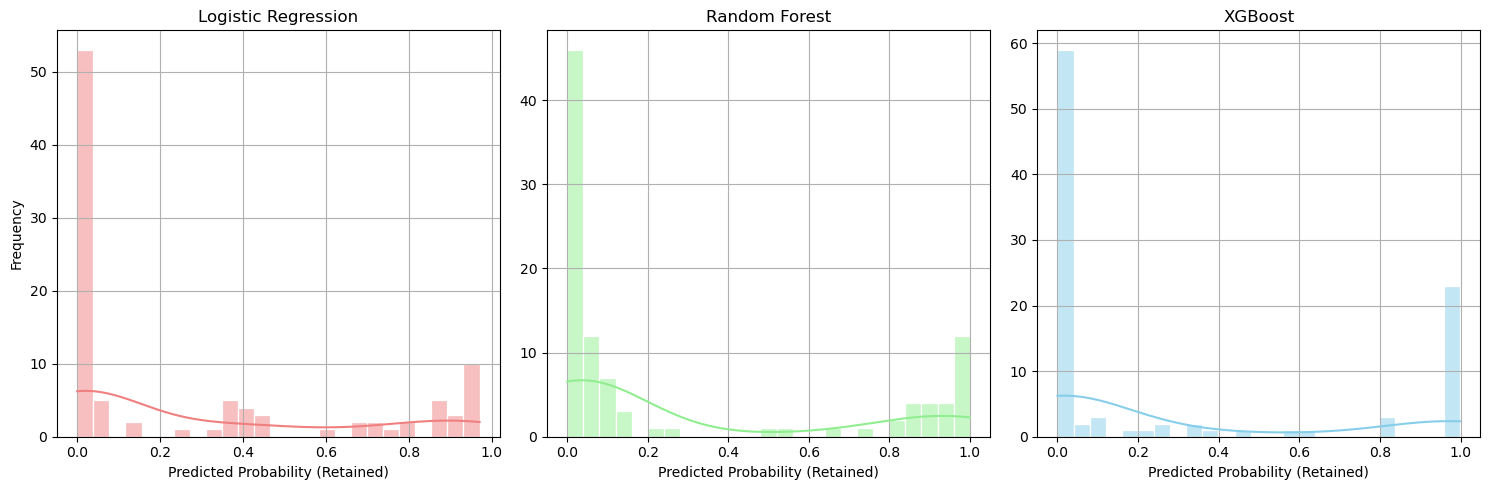

In [165]:
# Probability Distribution (ALL MODELS)

# Get predicted probabilities for class 1 (retained)
probs_logreg = logreg.predict_proba(X_test)[:, 1]
probs_rf = rf.predict_proba(X_test)[:, 1]
probs_xgb = xgb.predict_proba(X_test)[:, 1]

# Set up plot
plt.figure(figsize=(15, 5))

# Logistic Regression
plt.subplot(1, 3, 1)
sns.histplot(probs_logreg, bins=25, kde=True, color='lightcoral', edgecolor='white')
plt.title('Logistic Regression')
plt.xlabel('Predicted Probability (Retained)')
plt.ylabel('Frequency')
plt.grid(True)

# Random Forest
plt.subplot(1, 3, 2)
sns.histplot(probs_rf, bins=25, kde=True, color='lightgreen', edgecolor='white')
plt.title('Random Forest')
plt.xlabel('Predicted Probability (Retained)')
plt.ylabel('')
plt.grid(True)

# XGBoost
plt.subplot(1, 3, 3)
sns.histplot(probs_xgb, bins=25, kde=True, color='skyblue', edgecolor='white')
plt.title('XGBoost')
plt.xlabel('Predicted Probability (Retained)')
plt.ylabel('')
plt.grid(True)

plt.tight_layout()
plt.show()

### Predicted Probability Distributions – All Models

This visual compares the predicted probability distributions for the **retained class (1)** across all three models:

- **Logistic Regression**
- **Random Forest**
- **XGBoost**


**Conclusion:**
- **Logistic Regression** shows a more centered, bell-shaped distribution, indicating moderate confidence — most predictions fall between 0.3 and 0.7. This is expected due to its linear nature and lack of regularization.
  
- **Random Forest** exhibits a bimodal distribution with sharp peaks near 0 and 1, showing that it often makes very confident predictions. However, this can sometimes lead to overfitting if not well-calibrated.

- **XGBoost** also shows confident predictions with a wider spread, but in a more controlled and smooth distribution compared to Random Forest. This reflects its strength in modeling nonlinear relationships and its typical calibration.

These distributions provide insight into each model’s prediction **confidence** and **calibration behavior**, helping guide the final model selection not just on performance metrics, but also on how interpretable and reliable the probabilities are in business decision-making.


## Final Model Summary and Selection: 
--------------
### ✅ Final Model Summary – XGBoost

- **Project Overview**  
  This project focused on predicting player retention in *Apex Legends* using in-game behavior data.The dataset includes match-level metrics such as kills, assists, revives, damage dealt, legend selection, squad placement, and match type.

- **Goal**  
  To classify players as retained or churned based on recent gameplay activity and identify which behaviors most strongly predict long-term engagement.

- **Models Trained**  
  Three classification models were implemented and evaluated:
  - Logistic Regression  
  - Random Forest  
  - XGBoost

#### **Final Model Chosen: XGBoost!**
 


- **Performance of XGBoost (on test set)**  
  - Accuracy: 95%  
  - F1 Score (Retained): 0.91  
  - Precision: 0.93  
  - Recall: 0.90  

- **Why**  
  - Provided the most balanced trade-off between precision and recall.  
  - Effectively modeled nonlinear feature interactions common in gameplay behavior.  
  - Produced well-calibrated probability predictions with confident class separation.  
  - Scales well and is practical for real-world deployment.  

- **Why Logistic Regression Was Not Selected**  
  - Assumes linearity, which limits its ability to model complex behaviors.  
  - Lower recall meant more retained players were misclassified as churned.  
  - Less capable of capturing feature interactions in gameplay data.  

- **Why Random Forest Was Not Selected**  
  - Delivered strong performance, but predictions were overly confident (probabilities clustered near 0 and 1).
  - Less balanced between precision and recall compared to XGBoost.  
  - XGBoost was faster, more flexible, and better suited to behavioral modeling.  

-------

#### **How This Retention Model Helps EA Improve Player Engagement**

The retention model developed in this project provides Electronic Arts (EA) with a powerful tool to identify and understand the in-game behaviors that influence whether players continue engaging with Apex Legends. By using XGBoost to predict churn based on features such as match type, legend selection, session activity, and in-game performance, the model enables EA to detect at-risk players before they drop off. This early detection allows for timely interventions through personalized incentives, in-game nudges, or support outreach.

Beyond individual predictions, the model offers insight into broader gameplay trends. For example, if players who engage in ranked matches or communicate via voice chat are more likely to be retained, EA can prioritize those features in onboarding flows, seasonal promotions, or game design updates. Additionally, the model supports the development of more personalized reward systems, allowing EA to target high-risk players with tailored challenges or bonuses that encourage continued play.

From a system-level perspective, the predictions can be used to improve matchmaking logic—ensuring churn-risk players aren’t placed in frustrating or lopsided matches. This improves the player experience and increases the chance of re-engagement. Finally, the model can be integrated into marketing or CRM systems to inform re-engagement campaigns, helping EA deliver targeted messaging or highlight relevant game features based on individual behavioral patterns.

Altogether, this model transforms raw behavioral data into actionable insights that can enhance player lifecycle strategies, improve user satisfaction, and ultimately increase player lifetime value for EA.